# Question 1

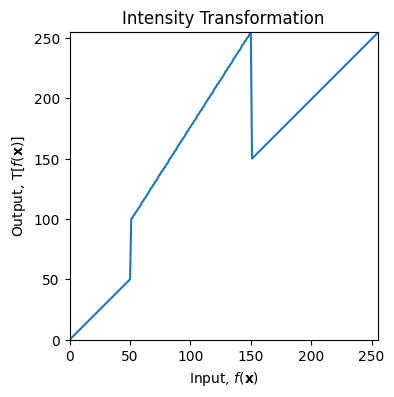

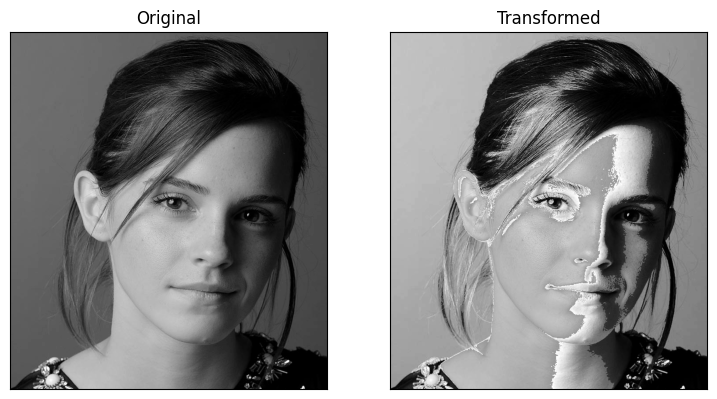

In [32]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread(r'C:\Users\nuwan\Downloads\emma.jpg', cv.IMREAD_GRAYSCALE)

#Identify and points that change transformations and put them to array
c = np.array([(50,50),(50,100),(150,255),(150,150)])
#Apply corresponding transformation to each region
t1 = np.linspace(0, c[0,1], c[0,0]+1 - 0).astype('uint8')
t2 = np.linspace(c[1,1], c[2,1], c[2,0] - c[1,0]).astype('uint8')
t3 = np.linspace(c[3,1], 255, 255 - c[3,0]).astype('uint8')
#Combine the transformations 
transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform,t3), axis=0).astype('uint8')
#Apply the transformation to image.
image_transformed = cv.LUT(img_orig, transform)

#Display the transformation
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\\mathrm{T}[f(\mathbf{x})]$')
ax.set_title('Intensity Transformation')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

#Displauy the result
fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(9, 9))
axes[0].imshow(img_orig, cmap="gray")
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(image_transformed, cmap="gray")
axes[1].set_title('Transformed')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

# Question 2

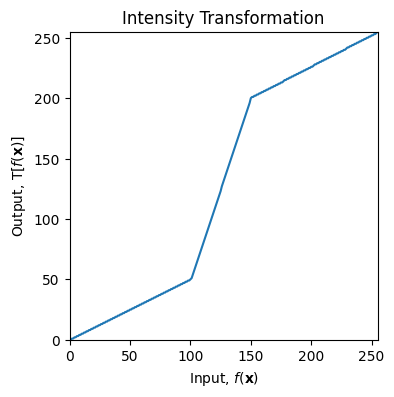

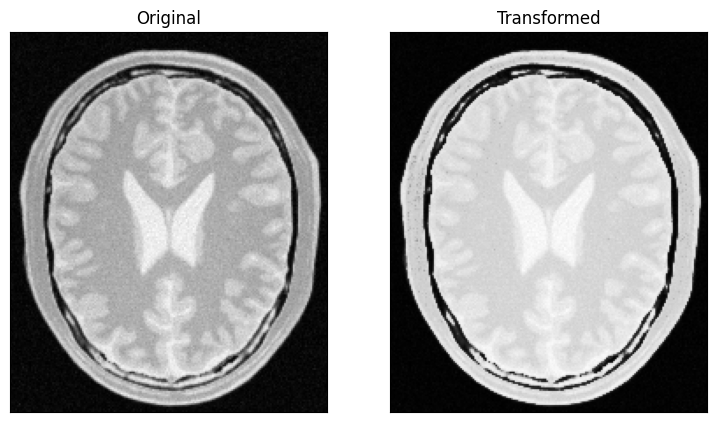

In [31]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread(r'C:\Users\nuwan\Downloads\BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

#Identify and points that change transformations and put them to array
c = np.array([(100,50),(150,200)])
#Apply corresponding transformation to each region
t1 = np.linspace(0, c[0,1], c[0,0]+1 - 0).astype('uint8')
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
#Combine the transformations 
transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform,t3), axis=0).astype('uint8')
#Apply the transformation to image.
image_transformed = cv.LUT(img_orig, transform)

#Display the transformation
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_title('Intensity Transformation')
ax.set_ylabel('Output, $\\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()


#Displauy the result
fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(9, 9))
axes[0].imshow(img_orig, cmap="gray")
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(image_transformed, cmap="gray")
axes[1].set_title('Transformed')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

# Question 3

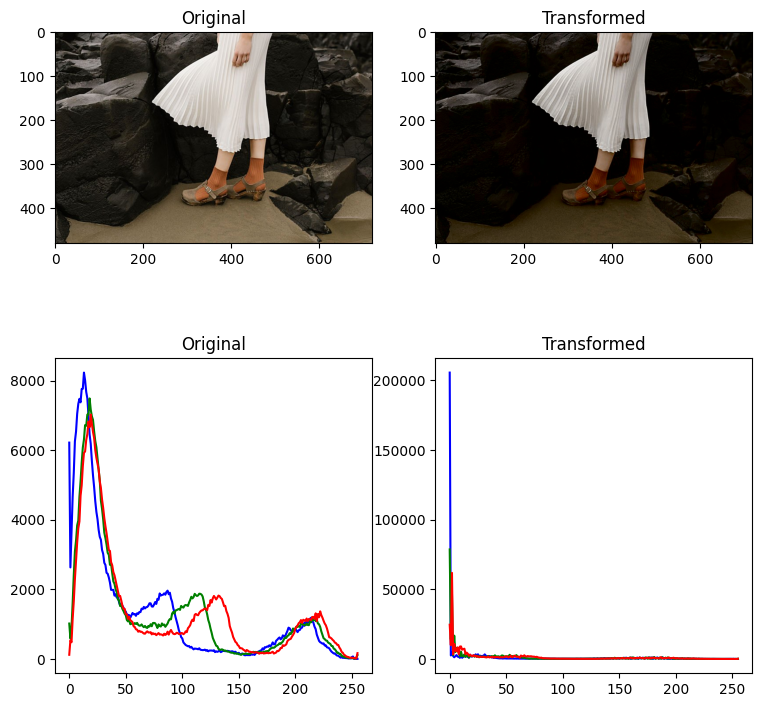

In [35]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread(r'C:\Users\nuwan\Downloads\highlights_and_shadows.jpg', cv.IMREAD_COLOR)

#Convert the BGR to LAB format
lab_img = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
#Split the image into L, a, b planes.
L,a,b = cv.split(lab_img)
#Apply Gamma correction to  L plane.
gamma = 2
table = np.array([(i/255.0)**gamma*255.0 for i in np.arange(0,256)]).astype('uint8')
gamma_L = cv.LUT(L, table)
new_lab_img = cv.merge((gamma_L,a,b))
#Convert LAB to BGR format
new_img = cv.cvtColor(new_lab_img, cv.COLOR_LAB2BGR)

fig, axarr = plt.subplots(2, 2, figsize=(9, 9))
#Display the result.
axarr[0, 0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
axarr[0, 0].set_title('Original')
axarr[0, 1].imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))
axarr[0, 1].set_title('Transformed')
#Calculate and display the histograms
colors = ('b', 'g', 'r')
for i, c in enumerate(colors):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
    axarr[1, 0].plot(hist_orig, color=c)
    axarr[1, 0].set_title('Original')
    hist_gamma = cv.calcHist([new_img], [i], None, [256], [0, 256])
    axarr[1, 1].plot(hist_gamma, color=c)
    axarr[1, 1].set_title('Transformed')

plt.show()

# Question 4

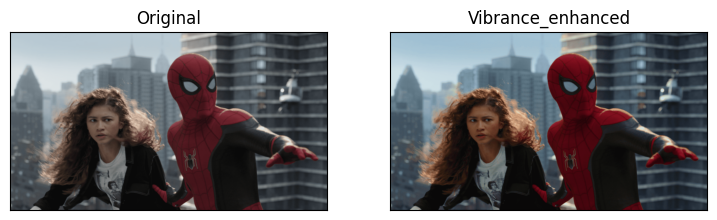

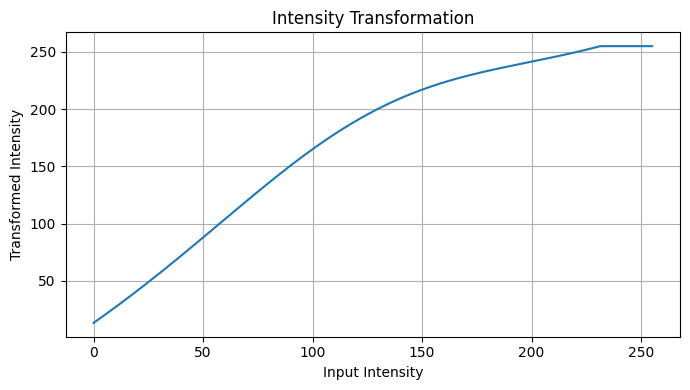

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig = cv.imread(r'C:\Users\nuwan\Downloads\spider.png')

# Function for intensity transformation
def transformation(x, a, sig = 70):
     return np.minimum(x + ((a*128) * np.exp(-(x - 128)**2 / (2 * sig**2))), 255)
     
#Convert RGB to HSV format.
hsv_img = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
# Split the image into hue, saturation, and value.
hue, saturation, value = cv.split(hsv_img)
# Apply Intensity transformation to the saturation plane.
a = 0.55
transformed_vec = np.vectorize(transformation)
transformed = transformed_vec(saturation, a).astype(np.uint8)
new_hsv_image = cv.merge((hue, transformed, value))
new_image = cv.cvtColor(new_hsv_image, cv.COLOR_HSV2RGB)
#Transformation curve
x = np.linspace(0, 255, 256)
transformation_curve = transformation(x, a)

# Display the images.
fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(9, 9))
axes[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(new_image)
axes[1].set_title('Vibrance_enhanced')
axes[1].set_xticks([]), axes[1].set_yticks([])

# Plot the intensity transformation function
plt.figure(figsize=(7, 4))
plt.plot(x, transformation_curve)
plt.title("Intensity Transformation")
plt.xlabel("Input Intensity")
plt.ylabel("Transformed Intensity")
plt.grid()

plt.tight_layout()
plt.show()


# Question 5

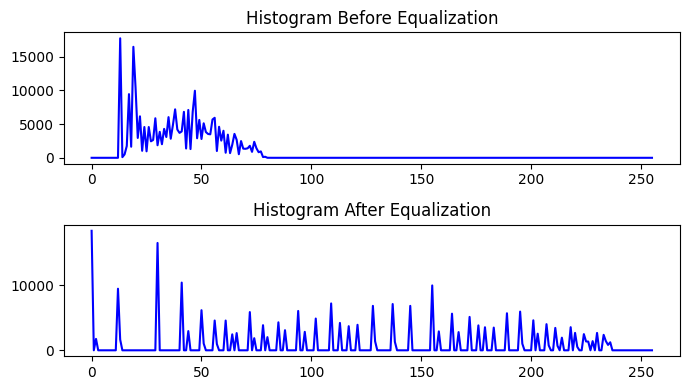

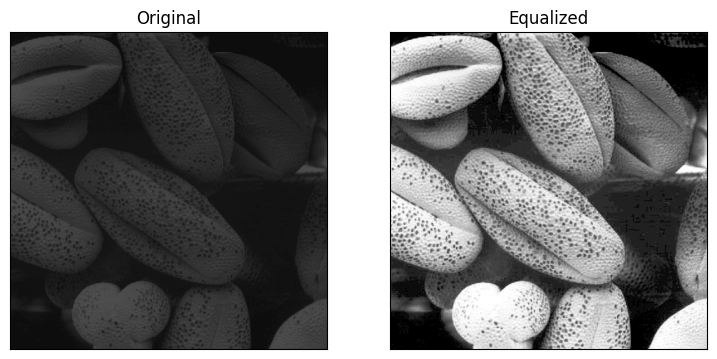

In [36]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load the image
image = cv.imread(r'C:\Users\nuwan\Downloads\shells.tif')


#Function to historgram equalization
def histogram_equalization(image):
    def calculate_histogram(image):
        histogram = Counter(image.flatten())
        return histogram

    def calculate_cdf(histogram):
        cdf = dict()
        cum_sum = 0
        for intensity, freq in sorted(histogram.items()):
            cum_sum += freq
            cdf[intensity] = cum_sum
        return cdf

    def normalize_cdf(cdf, image):
        cdf_min = min(cdf.values())
        normalized_cdf = {k: ((v-cdf_min)/(image.size-1))*255 for k, v in cdf.items()}
        return normalized_cdf

    histogram = calculate_histogram(image)
    cdf = calculate_cdf(histogram)
    normalized_cdf = normalize_cdf(cdf, image)
    #Apply normalized cdf to each pixel.
    equalized_image = np.array([[normalized_cdf[pixel] for pixel in row] for row in image])
    return equalized_image

gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
equalized_image = histogram_equalization(gray_image)
#Calculate histograms of original and equalized image.
hist_original, _ = np.histogram(gray_image.flatten(), bins=256, range=[0, 256])
hist_equalized, _ = np.histogram(equalized_image.flatten(), bins=256, range=[0, 256])

# Display histograms
plt.figure(figsize=(7, 4))
plt.subplot(2, 1, 1)
plt.plot(hist_original, color='blue')
plt.title("Histogram Before Equalization")

plt.subplot(2, 1, 2)
plt.plot(hist_equalized, color='blue')
plt.title("Histogram After Equalization")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(9, 9))
axes[0].imshow(image, cmap="gray")
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(equalized_image, cmap="gray")
axes[1].set_title('Equalized')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()


# Question 6

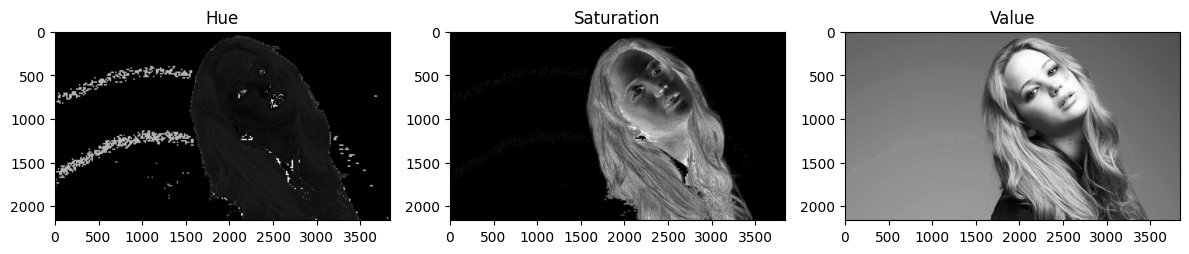

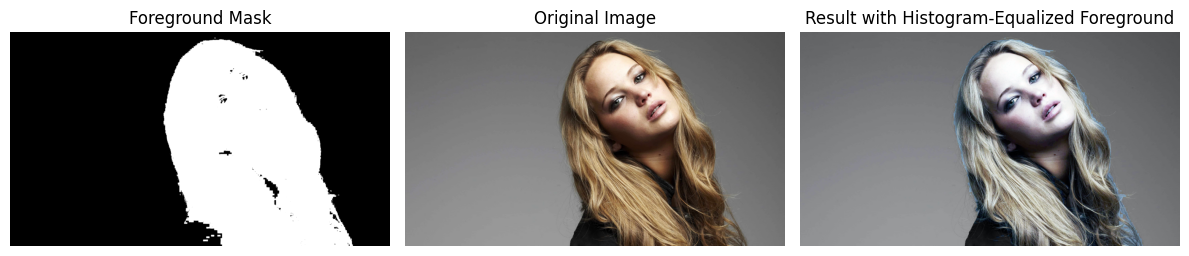

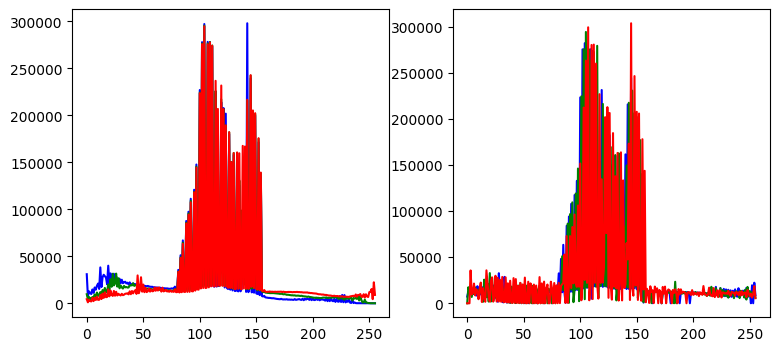

In [62]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread(r'C:\Users\nuwan\Downloads\jeniffer.jpg')
#convert BGR to HSV format.
image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
# Split the image into hue, saturation, and value planes
hue, saturation, value = cv.split(image_hsv)

# Display hue, saturation, and value planes in grayscale
plt.figure(figsize=(12, 9))
plt.subplot(131)
plt.imshow(hue, cmap='gray')
plt.title('Hue')

plt.subplot(132)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation')

plt.subplot(133)
plt.imshow(value, cmap='gray')
plt.title('Value')

plt.tight_layout()
plt.show()

# Threshold to extract the foreground mask
_, foreground_mask = cv.threshold(saturation, 15, 255, cv.THRESH_BINARY)

# Extract the foreground only using cv2.bitwise_and
foreground_saturation = cv.bitwise_and(saturation,saturation, mask=foreground_mask)
foreground_hue = cv.bitwise_and(hue,hue, mask=foreground_mask)
foreground_value = cv.bitwise_and(value,value, mask=foreground_mask)
foreground_hsv = cv.merge((foreground_hue,foreground_saturation,foreground_value))


#split the foreground to r,g,b planes
foreground_rgb = cv.cvtColor(foreground_hsv, cv.COLOR_HSV2RGB)
r, g, b = cv.split(foreground_rgb)
color = ('r', 'g', 'b')
palate = np.array([])

#Apply histogram equalization to each r,g,b plane of the foreground.
for i, c in enumerate(color):
    foreground_hist = cv.calcHist([foreground_rgb], [i], foreground_mask, [256], [0, 256])
    np.set_printoptions(precision=8, suppress=True)
    cdf = np.cumsum(foreground_hist)
    cdf_normalized = cdf * (255 / np.sum(foreground_hist))
    rounded = np.round(cdf_normalized).astype(int)
    palate = np.append(palate, rounded)

r_equalized = cv.LUT(r, palate[0:256])
g_equalized = cv.LUT(g, palate[256:512])
b_equalized = cv.LUT(b, palate[512:768])
foreground_equalized = cv.merge((r_equalized, g_equalized, b_equalized))
foreground_equalized = foreground_equalized.astype(np.uint8)  

#Extract the background only.
background_hue= cv.bitwise_and(hue, hue, mask=cv.bitwise_not(foreground_mask))
background_saturation = cv.bitwise_and(saturation, saturation, mask=cv.bitwise_not(foreground_mask))
background_value = cv.bitwise_and(value, value, mask=cv.bitwise_not(foreground_mask))

background_hsv = cv.merge((background_hue,background_saturation,background_value))
background_rgb = cv.cvtColor(background_hsv, cv.COLOR_HSV2RGB)

# Add the histogram equalized foreground with the background
result = cv.add(foreground_equalized, background_rgb)

# Display the original image and the result with histogram-equalized foreground
plt.figure(figsize=(12, 9))

plt.subplot(132)
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(131)
plt.imshow(foreground_mask, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')

plt.subplot(133)
plt.imshow(result)
plt.title('Result with Histogram-Equalized Foreground')
plt.axis('off')

plt.tight_layout()
plt.show()

#Plot the histogram equalization for original and the result.
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
colors = ('b', 'g', 'r')
for i, c in enumerate(colors):
    hist_orig = cv.calcHist([image], [i], None, [256], [0, 256])
    axes[0].plot(hist_orig, color=c)
    hist_gamma = cv.calcHist([result], [i], None, [256], [0, 256])
    axes[1].plot(hist_gamma, color=c)

plt.show()


# Question 7

Sobel filter using filter2D 

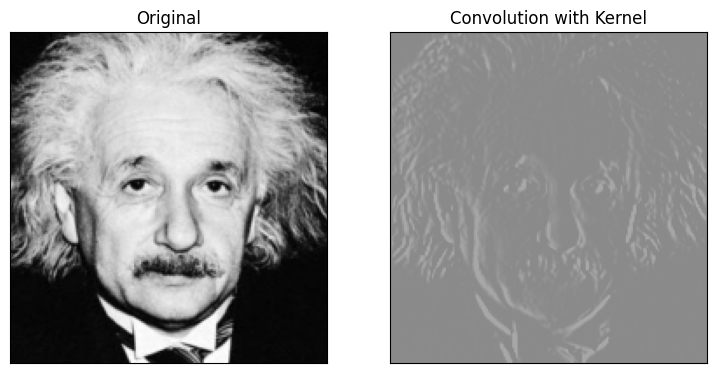

In [48]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\nuwan\Downloads\einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

#Sobel filter using filter 2D
kernel = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float')
imgc = cv.filter2D(img, -1, kernel)

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(9, 9))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(imgc, cmap='gray', vmin=-1200, vmax=1020)
axes[1].set_title('Convolution with Kernel')
axes[1].set_xticks([]), axes[1].set_yticks([])

plt.show()



Sobel filter using own function

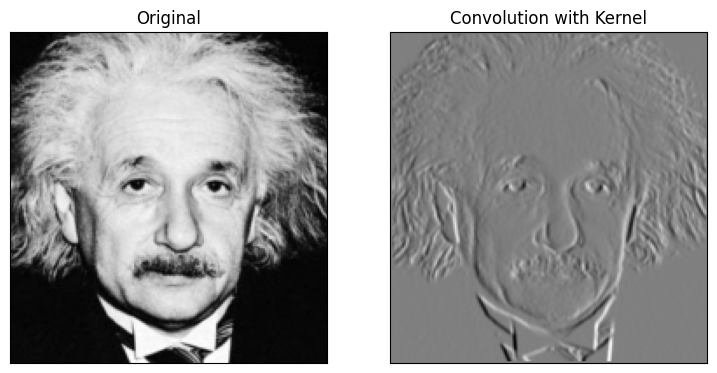

In [50]:
import cv2
import numpy as np

img = cv.imread(r'C:\Users\nuwan\Downloads\einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Define the sobel 3x3 kernel
kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])
# Get dimensions of the input matrix and the kernel
img_height, img_width = img.shape
kernel_height, kernel_width = kernel.shape
# Initialize an empty  matrix
img_matrix = np.zeros((img_height, img_width))
# Perform matrix convolution
for i in range(img_height-kernel_height+1):
    for j in range(img_width-kernel_width+1):
        window = img[i:i+kernel_height, j:j+kernel_width]
        img_matrix[i+1, j+1] = np.sum(window * kernel)
#normalize the image.        
new_image = ((img_matrix-np.min(img_matrix))/(np.max(img_matrix)-np.min(img_matrix)))*255

# Display the original image and the edges
fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(9, 9))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(new_image, cmap='gray')
axes[1].set_title('Convolution with Kernel')
axes[1].set_xticks([]), axes[1].set_yticks([])

plt.show()

Normalized SSD between nearest neighbour scaled image and original scaled image: 847702528.0000
Normalized SSD between bilinear scaled image and original scaled image: 715963392.0000


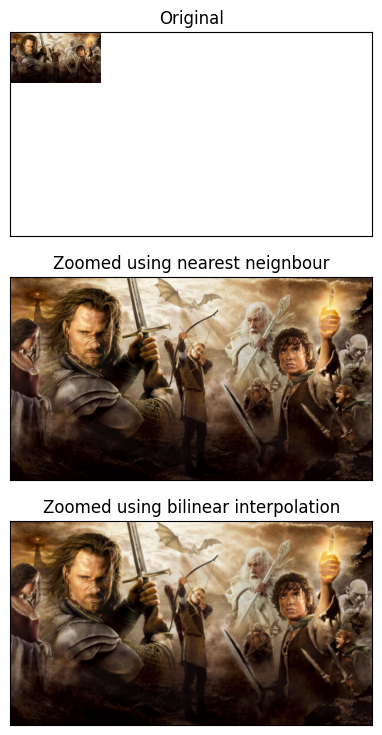

In [54]:
import cv2 as cv
import numpy as np
import math 
import matplotlib.pyplot as plt
original_img = cv.imread(r'C:\Users\nuwan\Downloads\zooming\zooming\im01small.png',cv.IMREAD_COLOR)
scaled_img = cv.imread(r'C:\Users\nuwan\Downloads\zooming\zooming\im01.png',cv.IMREAD_COLOR)

#function to zoom using nearest neighbour
def zoom_nearest(img, zoom_factor):
    old_h, old_w = img.shape[:2]
    new_h = int(old_h * zoom_factor)
    new_w = int(old_w * zoom_factor)
    scaled_img = np.zeros((new_h, new_w, img.shape[2]), dtype=np.uint8)
    
    for i in range(new_h):
        for j in range(new_w):
            initial_i = int(i / zoom_factor)
            initial_j = int(j / zoom_factor)
            scaled_img[i, j] = img[initial_i, initial_j]
    
    return scaled_img

# Function to Compute the normalized sum of squared difference (SSD)
def normalized_ssd(img1, img2):
    return np.sum((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32))**2)

# Set the zoom factor (s ∈ (0, 10])
zoom_factor = 4.0
# Zoom using nearest-neighbor
near_img = zoom_nearest(original_img, zoom_factor)
# Zoom using bilinear interpolation
bilinear_img = cv.resize(original_img,None, fx = zoom_factor, fy = zoom_factor, interpolation = cv.INTER_LINEAR)
#Calculate the normalized ssd to compare sacled image and originally scaled image
near_normalized_ssd = normalized_ssd(scaled_img,near_img)
bilinear_normalized_ssd = normalized_ssd(scaled_img,bilinear_img)

print(f"Normalized SSD between nearest neighbour scaled image and original scaled image: {near_normalized_ssd:.4f}")
print(f"Normalized SSD between bilinear scaled image and original scaled image: {bilinear_normalized_ssd:.4f}")

# Display the original image and the edges
fig, axes = plt.subplots(3, 1, sharex='all', sharey='all', figsize=(9,9))
axes[0].imshow(cv.cvtColor(original_img, cv.COLOR_BGR2RGB))
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(cv.cvtColor(near_img, cv.COLOR_BGR2RGB))
axes[1].set_title('Zoomed using nearest neignbour')
axes[1].set_xticks([]), axes[1].set_yticks([])

axes[2].imshow(cv.cvtColor(bilinear_img, cv.COLOR_BGR2RGB))
axes[2].set_title('Zoomed using bilinear interpolation')
axes[2].set_xticks([]), axes[1].set_yticks([])
plt.show()
  

# Question 9

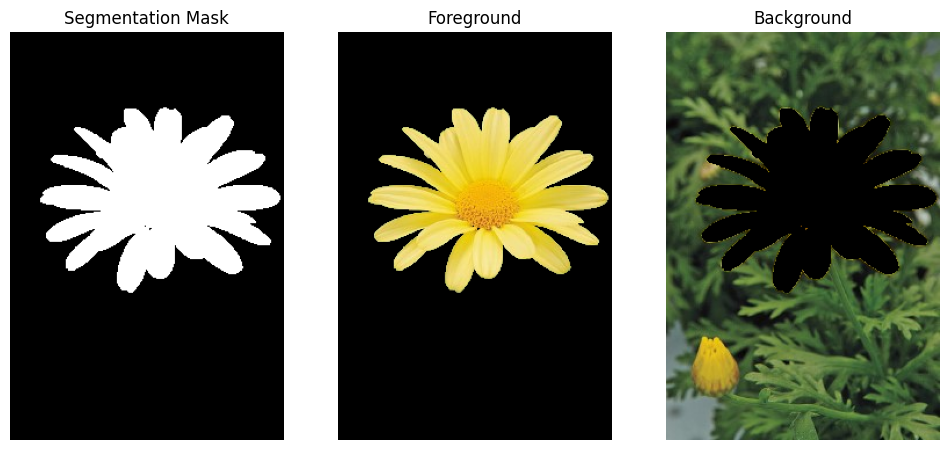

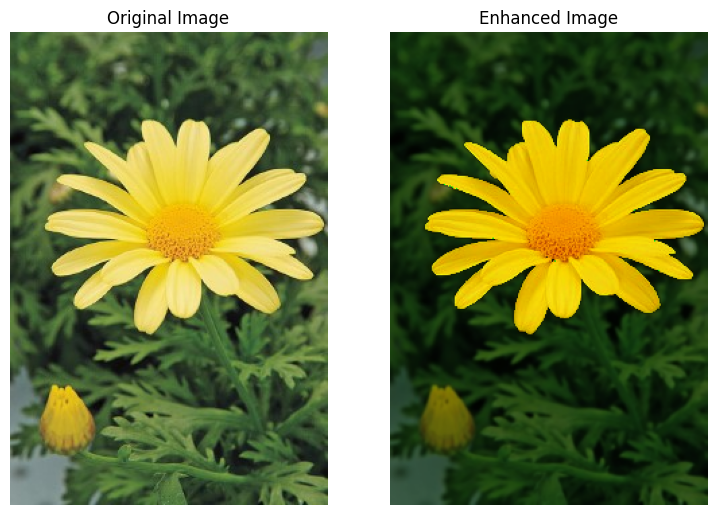

In [60]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
original_img = cv.imread(r'C:\Users\nuwan\Downloads\sunflower.jpg')

# Define a rectangle around thearound the flower
rec = (0, 50, 350, 200)
# Initialize mask and background/foreground models
mask = np.zeros(original_img.shape[:2], np.uint8)
back_model = np.zeros((1, 65), np.float64)
fore_model = np.zeros((1, 65), np.float64)
# Apply GrabCut algorithm
cv.grabCut(original_img, mask, rec, back_model, fore_model, 5, cv.GC_INIT_WITH_RECT)
Modified_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
# Apply the mask to the original image
foreground_img = original_img * Modified_mask[:, :, np.newaxis]
background_img = original_img - foreground_img

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(12, 9))
axes[0].imshow(Modified_mask, cmap='gray')
axes[0].set_title('Segmentation Mask')
axes[0].axis('off')

axes[1].imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))
axes[1].set_title('Foreground')
axes[1].axis('off')

axes[2].imshow(cv.cvtColor(background_img, cv.COLOR_BGR2RGB))
axes[2].set_title('Background')
axes[2].axis('off')

plt.show()

# Apply gamma correction to the foreground image
gamma1 = 1.5
table1 = np.array([(i / 255.0) ** gamma1 * 255.0 for i in np.arange(0, 256)]).astype('uint8')
H, S, V = cv.split(foreground_img)
gamma1_S = cv.LUT(S, table1)
foreground_img_gamma1 = cv.merge((H, gamma1_S, V))

gamma2 = 5
table2 = np.array([(i / 255.0) ** gamma2 * 255.0 for i in np.arange(0, 256)]).astype('uint8')
L, a, b = cv.split(foreground_img_gamma1)
gamma2_L = cv.LUT(L, table2)
foreground_img_gamma2 = cv.merge((gamma2_L, a, b))

# Apply Gaussian blur to the background
blurred_background = cv.GaussianBlur(background_img, (15, 15), sigmaX=0.8)
#Dark the background
brightness_factor = 0.7
dark_burred_background = np.clip(blurred_background * brightness_factor, 0, 255).astype(np.uint8)

# Apply gamma correction to the background image
gamma3 = 1.5
gamma4 = 1.2
table3 = np.array([(i / 255.0) ** gamma3 * 255.0 for i in np.arange(0, 256)]).astype('uint8')
table4 = np.array([(i / 255.0) ** gamma4 * 255.0 for i in np.arange(0, 256)]).astype('uint8')
H, S, V = cv.split(dark_burred_background)
gamma3_V = cv.LUT(V, table3)
gamma4_S = cv.LUT(S, table4)
gamma3_H = cv.LUT(H, table3) 
background_img_gamma = cv.merge((gamma3_H, gamma4_S, gamma3_V))

# Combine the dark blurred background and gamma-corrected foreground
enhanced_image = foreground_img_gamma2 + background_img_gamma

# Display the original and enhanced images 
fig, axes = plt.subplots(1, 2, figsize=(9, 9))
axes[0].imshow(cv.cvtColor(original_img, cv.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB))
axes[1].set_title('Enhanced Image')
axes[1].axis('off')

plt.show()
